In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
os.chdir('/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut') #sets working directory to repo/project root folder
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0


In [2]:
df = pd.read_csv('01_data/combined_frac_infect/mAb2_frac_infect.csv')
df = df[df["serum"] != "D25"]
print(df['virus'].unique())

['RSV B N201T' 'RSV B N201S' 'RSV B K68Q' 'RSV A 1982' 'RSV A 2020'
 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV' 'RSV B 1982']


In [3]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in po

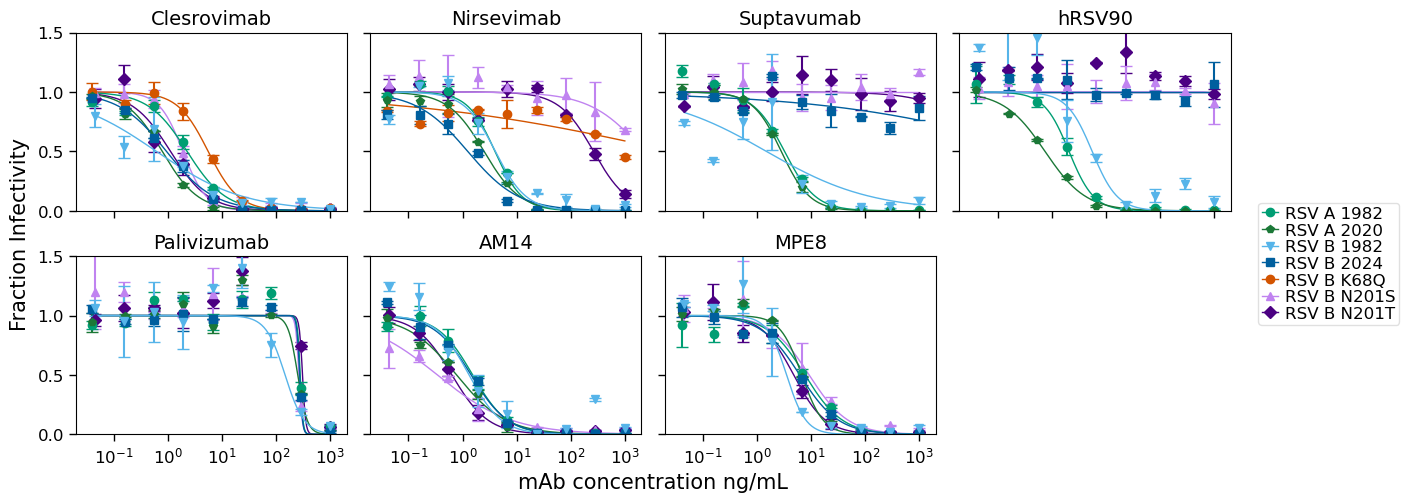

In [4]:
fig, axes = fits.plotSera(
    sera=['Clesrovimab','Nirsevimab', 'Suptavumab','hRSV90','Palivizumab','AM14', 'MPE8'], 
    viruses=['RSV A 1982', 'RSV A 2020' ,'RSV B 1982', 'RSV B 2024','RSV B K68Q', 'RSV B N201S', 'RSV B N201T'],
    xlabel='mAb concentration ng/mL', 
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=11, 
    colors=['#009E73','#1B7837','#56B4E9', '#005F9E','#D35400','#C083F0','#4B0082',
        '#009E73','#1B7837','#56B4E9', '#005F9E','#F4B400', '#4B0082', '#C083F0',
        '#A3D5FF','#0A2472','#A7D397','#1B4D3E', '#999999', '#4B0082', '#D8BFD8',
        '#56B4E9', '#0072B2', '#009E73','#1B7837', '#000000', '#999999','#872BB2',
            '#1B7837', '#009E73', '#999999', '#872BB2', '#FF8D3D', '#FFDA4D'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    #sharex=False,
    ncol=4
)

# Ensure we correctly iterate over all subplot axes
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Flatten in case it's a grid
        ax.set_ylim(0, 1.5)  # Limits y-axis from 0 to 1.5
else:
    axes.set_ylim(0, 1.5)  # If it's a single axis object

# Save the figure
fig.savefig('03_output/plots/mAbs_Fig7.svg', bbox_inches='tight')


## supplemental figure 8 (lab adapted strains)

### rep2

In [5]:
print(df['virus'].unique())

['RSV B N201T' 'RSV B N201S' 'RSV B K68Q' 'RSV A 1982' 'RSV A 2020'
 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV' 'RSV B 1982']


In [6]:
df = pd.read_csv('01_data/combined_frac_infect/mAb2_frac_infect.csv')
df = df[df["serum"] != "D25"]
print(df['virus'].unique())

['RSV B N201T' 'RSV B N201S' 'RSV B K68Q' 'RSV A 1982' 'RSV A 2020'
 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV' 'RSV B 1982']


In [7]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

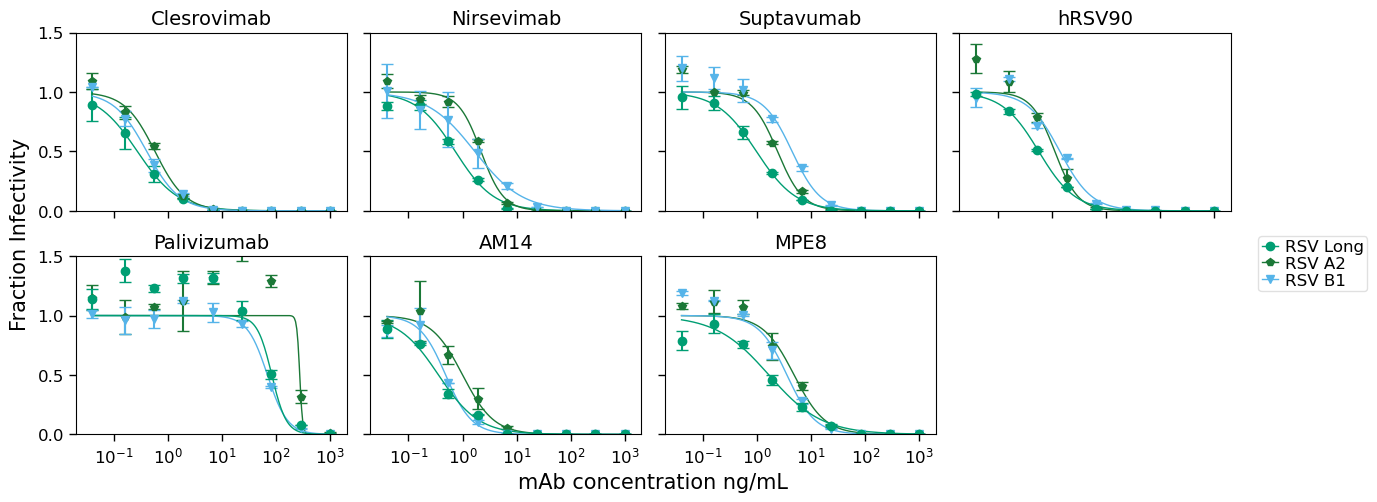

In [10]:
fig, axes = fits.plotSera(
    sera=['Clesrovimab','Nirsevimab', 'Suptavumab','hRSV90','Palivizumab','AM14', 'MPE8'], 
    viruses=['RSV Long', 'RSV A2', 'RSV B1'],
    xlabel='mAb concentration ng/mL', 
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=11, 
    colors=['#009E73','#1B7837','#56B4E9', '#005F9E','#D35400','#C083F0','#4B0082',
        '#009E73','#1B7837','#56B4E9', '#005F9E','#F4B400', '#4B0082', '#C083F0',
        '#A3D5FF','#0A2472','#A7D397','#1B4D3E', '#999999', '#4B0082', '#D8BFD8',
        '#56B4E9', '#0072B2', '#009E73','#1B7837', '#000000', '#999999','#872BB2',
            '#1B7837', '#009E73', '#999999', '#872BB2', '#FF8D3D', '#FFDA4D'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    #sharex=False,
    ncol=4
)

# Ensure we correctly iterate over all subplot axes
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Flatten in case it's a grid
        ax.set_ylim(0, 1.5)  # Limits y-axis from 0 to 1.5
else:
    axes.set_ylim(0, 1.5)  # If it's a single axis object

# Save the figure
fig.savefig('03_output/plots/mAbs_Supplemental_Fig8_rep2.svg', bbox_inches='tight')


### rep1

In [11]:
df = pd.read_csv('01_data/combined_frac_infect/mAb1_frac_infect.csv')
df = df[df["serum"] != "D25"]
print(df['virus'].unique())

['RSV B N201S' 'RSV B N201T' 'RSV B 1982' 'RSV B K68Q' 'RSV A 1982'
 'RSV A 2020' 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV']


In [12]:
print(df['virus'].unique())

['RSV B N201S' 'RSV B N201T' 'RSV B 1982' 'RSV B K68Q' 'RSV A 1982'
 'RSV A 2020' 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV']


In [13]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


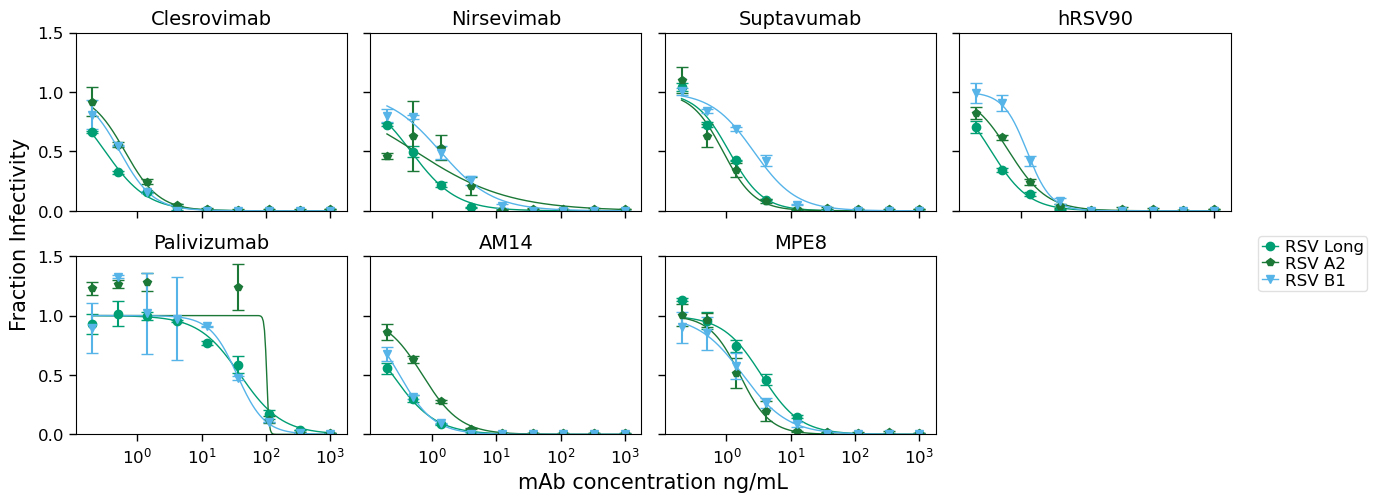

In [14]:
fig, axes = fits.plotSera(
    sera=['Clesrovimab','Nirsevimab', 'Suptavumab','hRSV90','Palivizumab','AM14', 'MPE8'], 
    viruses=['RSV Long', 'RSV A2', 'RSV B1'],
    xlabel='mAb concentration ng/mL', 
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=11, 
    colors=['#009E73','#1B7837','#56B4E9', '#005F9E','#D35400','#C083F0','#4B0082',
        '#009E73','#1B7837','#56B4E9', '#005F9E','#F4B400', '#4B0082', '#C083F0',
        '#A3D5FF','#0A2472','#A7D397','#1B4D3E', '#999999', '#4B0082', '#D8BFD8',
        '#56B4E9', '#0072B2', '#009E73','#1B7837', '#000000', '#999999','#872BB2',
            '#1B7837', '#009E73', '#999999', '#872BB2', '#FF8D3D', '#FFDA4D'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    #sharex=False,
    ncol=4
)

# Ensure we correctly iterate over all subplot axes
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Flatten in case it's a grid
        ax.set_ylim(0, 1.5)  # Limits y-axis from 0 to 1.5
else:
    axes.set_ylim(0, 1.5)  # If it's a single axis object

# Save the figure
fig.savefig('03_output/plots/mAbs_Supplemental_Fig8_rep1.svg', bbox_inches='tight')


## supplemental figure, rep 2 clinical strains 

In [15]:
df = pd.read_csv('01_data/combined_frac_infect/mAb1_frac_infect.csv')
df = df[df["serum"] != "D25"]
print(df['virus'].unique())

['RSV B N201S' 'RSV B N201T' 'RSV B 1982' 'RSV B K68Q' 'RSV A 1982'
 'RSV A 2020' 'RSV B 2024' 'RSV Long' 'RSV A2' 'RSV B1' 'VSV']


In [16]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: overflow encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/fh/fast/bloom_j/software/miniforge3/envs/BloomLab/lib/python3.12/site-packages/neutcurve/hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  

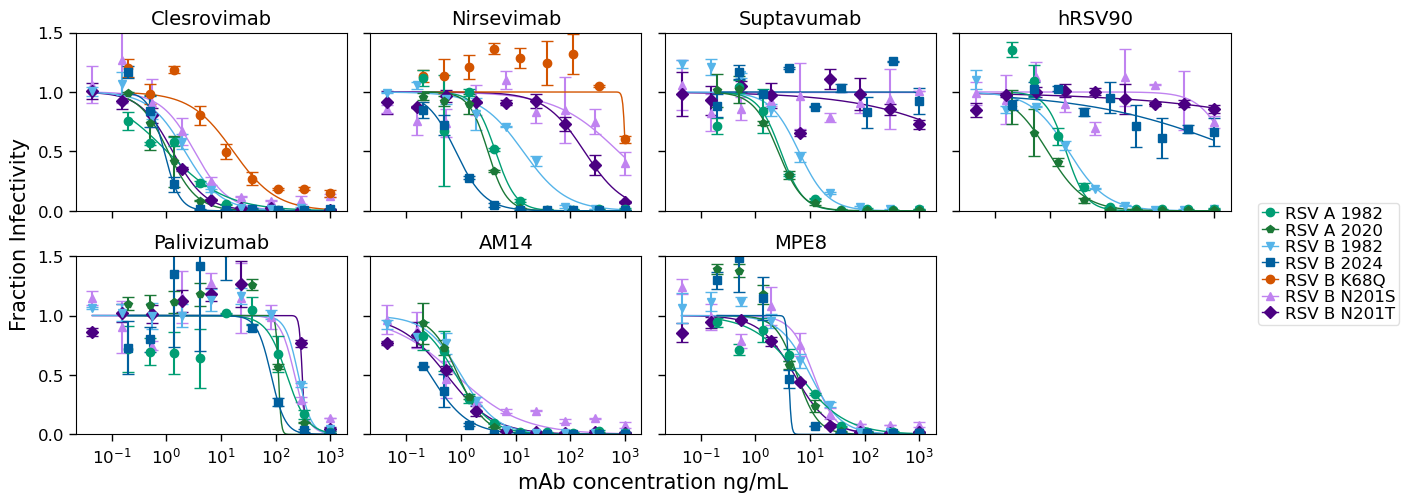

In [17]:
fig, axes = fits.plotSera(
    sera=['Clesrovimab','Nirsevimab', 'Suptavumab','hRSV90','Palivizumab','AM14', 'MPE8'], 
    viruses=['RSV A 1982', 'RSV A 2020' ,'RSV B 1982', 'RSV B 2024','RSV B K68Q', 'RSV B N201S', 'RSV B N201T'],
    xlabel='mAb concentration ng/mL', 
    ylabel="Fraction Infectivity",
    max_viruses_per_subplot=11, 
    colors=['#009E73','#1B7837','#56B4E9', '#005F9E','#D35400','#C083F0','#4B0082',
        '#009E73','#1B7837','#56B4E9', '#005F9E','#F4B400', '#4B0082', '#C083F0',
        '#A3D5FF','#0A2472','#A7D397','#1B4D3E', '#999999', '#4B0082', '#D8BFD8',
        '#56B4E9', '#0072B2', '#009E73','#1B7837', '#000000', '#999999','#872BB2',
            '#1B7837', '#009E73', '#999999', '#872BB2', '#FF8D3D', '#FFDA4D'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    #sharex=False,
    ncol=4
)

# Ensure we correctly iterate over all subplot axes
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Flatten in case it's a grid
        ax.set_ylim(0, 1.5)  # Limits y-axis from 0 to 1.5
else:
    axes.set_ylim(0, 1.5)  # If it's a single axis object

# Save the figure
fig.savefig('03_output/plots/mAbs_Supplemental_Fig8_rep2_standard_strains.svg', bbox_inches='tight')
